In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [4]:
schools = pd.read_csv('2015_16_Statewise_Secondary.csv')
print(schools.shape)

(36, 630)


In [5]:
schools_meta = pd.read_csv('2015_16_Statewise_Elementary_Metadata.csv')

In [6]:
schools.describe()

statcd      area_sqkm  tot_population  urban_population  \
count  36.000000      35.000000       35.000000         35.000000   
mean   18.500000   93921.142857    34576.955429         26.776571   
std    10.535654  103754.389960    44422.781183         16.450826   
min     1.000000      32.000000       64.430000          8.360000   
25%     9.750000    9367.500000     1420.165000         16.435000   
50%    18.500000   53483.000000    16753.240000         21.990000   
75%    27.250000  145449.000000    60757.165000         30.965000   
max    36.000000  342239.000000   199581.480000         77.030000   

       grwoth_rate     sexratio  sc_population  st_population  literacy_rate  \
count    35.000000    35.000000      35.000000      35.000000      35.000000   
mean     19.030857   929.285714      11.760000      22.940000      78.648857   
std      11.021898    79.686360       8.670715      29.179648       8.121043   
min      -0.470000   618.000000       0.000000       0.000000      63.820000   
25%      13.830000   900.500000       3.150000       2.200000      72.110000   
50%      18.650000   946.000000      12.800000      10.200000      79.310000   
75%      22.465000   974.500000      17.800000      31.200000      86.305000   
max      55.500000  1084.000000      31.900000      94.800000      93.910000   

       male_literacy_rate      ...       tchmed_nr  tchoth_nr  tchse_nr  \
count           35.000000      ...       36.000000  36.000000      36.0   
mean            85.271714      ...        0.111111   0.027778       0.0   
std              6.326527      ...        0.666667   0.166667       0.0   
min             73.390000      ...        0.000000   0.000000       0.0   
25%             80.520000      ...        0.000000   0.000000       0.0   
50%             86.460000      ...        0.000000   0.000000       0.0   
75%             90.685000      ...        0.000000   0.000000       0.0   
max             96.110000      ...        4.000000   1.000000       0.0   

         tchnr_nr      enrc7_py      enrc8_py      enrc9_py     enrc10_py  \
count   36.000000  3.600000e+01  3.600000e+01  3.600000e+01  3.600000e+01   
mean    39.000000  6.226475e+05  6.071477e+05  5.637559e+05  5.001037e+05   
std    160.386497  8.092190e+05  7.925171e+05  7.217480e+05  6.690257e+05   
min      0.000000  1.118000e+03  1.202000e+03  1.486000e+03  1.459000e+03   
25%      0.000000  3.143475e+04  3.018975e+04  3.024175e+04  2.203975e+04   
50%      0.000000  4.272985e+05  4.199505e+05  4.224935e+05  3.304340e+05   
75%      0.000000  7.881902e+05  7.713010e+05  7.182315e+05  6.744685e+05   
max    889.000000  3.675032e+06  3.692986e+06  3.372729e+06  3.331344e+06   

           enr11_py      enr12_py  
count  3.600000e+01  3.600000e+01  
mean   3.353552e+05  3.174360e+05  
std    5.109993e+05  4.828989e+05  
min    1.026000e+03  9.640000e+02  
25%    1.841125e+04  1.550275e+04  
50%    1.685340e+05  1.763650e+05  
75%    4.049085e+05  3.769658e+05  
max    2.700413e+06  2.541247e+06  

[8 rows x 628 columns]

In [7]:
schools.isnull().sum()

ac_year                 0
statcd                  0
statname                0
area_sqkm               1
tot_population          1
urban_population        1
grwoth_rate             1
sexratio                1
sc_population           1
st_population           1
literacy_rate           1
male_literacy_rate      1
female_literacy_rate    1
distcd                  0
blkcd                   0
villages                0
clusters                0
schools                 0
sch_1                   0
sch_2                   0
sch_3                   0
sch_4                   0
sch_5                   0
sch_6                   0
sch_7                   0
sch_r_1                 0
sch_r_2                 0
sch_r_3                 0
sch_r_4                 0
sch_r_5                 0
                       ..
tchug_p_nr              3
tchgrad_p_nr            3
tchpg_p_nr              3
tchphd_p_nr             3
tchpd_p_nr              3
tchnr_p_nr              3
tchbtt_m                0
tchbed_m    

In [8]:
y = schools['literacy_rate']
y=y.fillna(y.mean())
#print(y.isnull())

# feature reduction

In [9]:

for i in range(1,8):
    base='enr_' + str(i)
    del schools[base]

In [10]:
for i in range(1,8):
    base = 'enr_u_'+str(i)    
    del schools[base]

In [11]:
for i in range(1,8):
    base = 'tch_' + str(i)
    del schools[base]

In [12]:
schools.head()

ac_year  statcd           statname  area_sqkm  tot_population  \
0  2015-16       1  Jammu And Kashmir   222236.0        12548.93   
1  2015-16       2   Himachal Pradesh    55673.0         6856.51   
2  2015-16       3             Punjab    50362.0        27704.24   
3  2015-16       4         Chandigarh      114.0         1054.69   
4  2015-16       5        Uttarakhand    53483.0        10116.75   

   urban_population  grwoth_rate  sexratio  sc_population  st_population  \
0             20.05        23.71     883.0            7.4           11.9   
1              8.69        12.81     974.0           25.2            5.7   
2             29.82        13.73     893.0           31.9            0.0   
3             76.66        17.10     818.0           18.9            0.0   
4             21.54        19.17     963.0           18.8            2.9   

     ...     tchmed_nr  tchoth_nr  tchse_nr  tchnr_nr  enrc7_py  enrc8_py  \
0    ...             0          0         0         0    199954    203537   
1    ...             0          0         0         0    122101    122413   
2    ...             0          0         0         0    481982    473349   
3    ...             0          0         0         0     21344     21321   
4    ...             0          0         0         0    193393    193890   

   enrc9_py  enrc10_py  enr11_py  enr12_py  
0    192567     146066    138963    116187  
1    130258     135253    119932     98924  
2    451412     426034    351639    342835  
3     21545      16708     20948     17943  
4    197590     200769    150799    162100  

[5 rows x 609 columns]

In [13]:
for i in range(1,8):
    base = 'sing_tch_sch_' + str(i)
    del schools[base]

In [14]:
for i in range(1,8):
    base = 'girls_toilet_' + str(i)
    del schools[base]

In [15]:
schools.head()

ac_year  statcd           statname  area_sqkm  tot_population  \
0  2015-16       1  Jammu And Kashmir   222236.0        12548.93   
1  2015-16       2   Himachal Pradesh    55673.0         6856.51   
2  2015-16       3             Punjab    50362.0        27704.24   
3  2015-16       4         Chandigarh      114.0         1054.69   
4  2015-16       5        Uttarakhand    53483.0        10116.75   

   urban_population  grwoth_rate  sexratio  sc_population  st_population  \
0             20.05        23.71     883.0            7.4           11.9   
1              8.69        12.81     974.0           25.2            5.7   
2             29.82        13.73     893.0           31.9            0.0   
3             76.66        17.10     818.0           18.9            0.0   
4             21.54        19.17     963.0           18.8            2.9   

     ...     tchmed_nr  tchoth_nr  tchse_nr  tchnr_nr  enrc7_py  enrc8_py  \
0    ...             0          0         0         0    199954    203537   
1    ...             0          0         0         0    122101    122413   
2    ...             0          0         0         0    481982    473349   
3    ...             0          0         0         0     21344     21321   
4    ...             0          0         0         0    193393    193890   

   enrc9_py  enrc10_py  enr11_py  enr12_py  
0    192567     146066    138963    116187  
1    130258     135253    119932     98924  
2    451412     426034    351639    342835  
3     21545      16708     20948     17943  
4    197590     200769    150799    162100  

[5 rows x 595 columns]

In [16]:
for i in range(1,8):
    base = 'boys_toilet_' + str(i)
    del schools[base]

In [17]:
for i in range(1,8):
    base = 'enrg_' + str(i)
    del schools[base]

In [18]:
schools.head()

ac_year  statcd           statname  area_sqkm  tot_population  \
0  2015-16       1  Jammu And Kashmir   222236.0        12548.93   
1  2015-16       2   Himachal Pradesh    55673.0         6856.51   
2  2015-16       3             Punjab    50362.0        27704.24   
3  2015-16       4         Chandigarh      114.0         1054.69   
4  2015-16       5        Uttarakhand    53483.0        10116.75   

   urban_population  grwoth_rate  sexratio  sc_population  st_population  \
0             20.05        23.71     883.0            7.4           11.9   
1              8.69        12.81     974.0           25.2            5.7   
2             29.82        13.73     893.0           31.9            0.0   
3             76.66        17.10     818.0           18.9            0.0   
4             21.54        19.17     963.0           18.8            2.9   

     ...     tchmed_nr  tchoth_nr  tchse_nr  tchnr_nr  enrc7_py  enrc8_py  \
0    ...             0          0         0         0    199954    203537   
1    ...             0          0         0         0    122101    122413   
2    ...             0          0         0         0    481982    473349   
3    ...             0          0         0         0     21344     21321   
4    ...             0          0         0         0    193393    193890   

   enrc9_py  enrc10_py  enr11_py  enr12_py  
0    192567     146066    138963    116187  
1    130258     135253    119932     98924  
2    451412     426034    351639    342835  
3     21545      16708     20948     17943  
4    197590     200769    150799    162100  

[5 rows x 581 columns]

In [19]:
for i in range(1,8):
    base = 'tchf_' + str(i)
    del schools[base]

In [20]:
for i in range(1,8):
    base = 'cls_' + str(i)
    del schools[base]

In [21]:
# sch_2006_
for i in range(1,8):
    base = 'sch_2006_' + str(i)
    del schools[base]

In [22]:
for i in range(1,8):
    base = 'pta_' + str(i)
    del schools[base]

In [23]:
for i in range(1,8):
    base = 'sch_bld_com_' + str(i)
    del schools[base]

In [24]:
schools.head()

ac_year  statcd           statname  area_sqkm  tot_population  \
0  2015-16       1  Jammu And Kashmir   222236.0        12548.93   
1  2015-16       2   Himachal Pradesh    55673.0         6856.51   
2  2015-16       3             Punjab    50362.0        27704.24   
3  2015-16       4         Chandigarh      114.0         1054.69   
4  2015-16       5        Uttarakhand    53483.0        10116.75   

   urban_population  grwoth_rate  sexratio  sc_population  st_population  \
0             20.05        23.71     883.0            7.4           11.9   
1              8.69        12.81     974.0           25.2            5.7   
2             29.82        13.73     893.0           31.9            0.0   
3             76.66        17.10     818.0           18.9            0.0   
4             21.54        19.17     963.0           18.8            2.9   

     ...     tchmed_nr  tchoth_nr  tchse_nr  tchnr_nr  enrc7_py  enrc8_py  \
0    ...             0          0         0         0    199954    203537   
1    ...             0          0         0         0    122101    122413   
2    ...             0          0         0         0    481982    473349   
3    ...             0          0         0         0     21344     21321   
4    ...             0          0         0         0    193393    193890   

   enrc9_py  enrc10_py  enr11_py  enr12_py  
0    192567     146066    138963    116187  
1    130258     135253    119932     98924  
2    451412     426034    351639    342835  
3     21545      16708     20948     17943  
4    197590     200769    150799    162100  

[5 rows x 546 columns]

In [25]:
# smdc_
for i in range(1,8):
    base = 'smdc_' + str(i)
    del schools[base]
    

In [26]:
for i in range(1,8):
    base = 'medchk_' + str(i)
    del schools[base]

In [27]:
schools.head()

ac_year  statcd           statname  area_sqkm  tot_population  \
0  2015-16       1  Jammu And Kashmir   222236.0        12548.93   
1  2015-16       2   Himachal Pradesh    55673.0         6856.51   
2  2015-16       3             Punjab    50362.0        27704.24   
3  2015-16       4         Chandigarh      114.0         1054.69   
4  2015-16       5        Uttarakhand    53483.0        10116.75   

   urban_population  grwoth_rate  sexratio  sc_population  st_population  \
0             20.05        23.71     883.0            7.4           11.9   
1              8.69        12.81     974.0           25.2            5.7   
2             29.82        13.73     893.0           31.9            0.0   
3             76.66        17.10     818.0           18.9            0.0   
4             21.54        19.17     963.0           18.8            2.9   

     ...     tchmed_nr  tchoth_nr  tchse_nr  tchnr_nr  enrc7_py  enrc8_py  \
0    ...             0          0         0         0    199954    203537   
1    ...             0          0         0         0    122101    122413   
2    ...             0          0         0         0    481982    473349   
3    ...             0          0         0         0     21344     21321   
4    ...             0          0         0         0    193393    193890   

   enrc9_py  enrc10_py  enr11_py  enr12_py  
0    192567     146066    138963    116187  
1    130258     135253    119932     98924  
2    451412     426034    351639    342835  
3     21545      16708     20948     17943  
4    197590     200769    150799    162100  

[5 rows x 532 columns]

In [28]:
for i in range(1,8):
    base = 'pground_' + str(i)
    del schools[base]

In [29]:
for i in range(1,8):
    base = 'ict_lab_' + str(i)
    del schools[base]

In [30]:
for i in range(1,8):
    base = 'internet_' + str(i)
    del schools[base]

In [31]:

schools.head()

ac_year  statcd           statname  area_sqkm  tot_population  \
0  2015-16       1  Jammu And Kashmir   222236.0        12548.93   
1  2015-16       2   Himachal Pradesh    55673.0         6856.51   
2  2015-16       3             Punjab    50362.0        27704.24   
3  2015-16       4         Chandigarh      114.0         1054.69   
4  2015-16       5        Uttarakhand    53483.0        10116.75   

   urban_population  grwoth_rate  sexratio  sc_population  st_population  \
0             20.05        23.71     883.0            7.4           11.9   
1              8.69        12.81     974.0           25.2            5.7   
2             29.82        13.73     893.0           31.9            0.0   
3             76.66        17.10     818.0           18.9            0.0   
4             21.54        19.17     963.0           18.8            2.9   

     ...     tchmed_nr  tchoth_nr  tchse_nr  tchnr_nr  enrc7_py  enrc8_py  \
0    ...             0          0         0         0    199954    203537   
1    ...             0          0         0         0    122101    122413   
2    ...             0          0         0         0    481982    473349   
3    ...             0          0         0         0     21344     21321   
4    ...             0          0         0         0    193393    193890   

   enrc9_py  enrc10_py  enr11_py  enr12_py  
0    192567     146066    138963    116187  
1    130258     135253    119932     98924  
2    451412     426034    351639    342835  
3     21545      16708     20948     17943  
4    197590     200769    150799    162100  

[5 rows x 511 columns]

In [32]:
for i in range(1,8):
    base = 'hostel_girls_' + str(i)
    del schools[base]

In [33]:
for i in range(1,8):
    base = 'hostel_boys_' + str(i)
    del schools[base]

In [34]:
for i in range(1,8):
    base = 'hmroom_' + str(i)
    del schools[base]

In [35]:
for i in range(1,8):
    base = 'lab_asst_' + str(i)
    del schools[base]

In [36]:
for i in range(1,8):
    base = 'cwsn_sch_' + str(i)
    del schools[base]

In [37]:
for i in range(1,8):
    base = 'bndrywall_' + str(i)
    del schools[base]

In [38]:
for i in range(1,8):
    base = 'librarian_' + str(i)
    del schools[base]

In [39]:
schools.head()

ac_year  statcd           statname  area_sqkm  tot_population  \
0  2015-16       1  Jammu And Kashmir   222236.0        12548.93   
1  2015-16       2   Himachal Pradesh    55673.0         6856.51   
2  2015-16       3             Punjab    50362.0        27704.24   
3  2015-16       4         Chandigarh      114.0         1054.69   
4  2015-16       5        Uttarakhand    53483.0        10116.75   

   urban_population  grwoth_rate  sexratio  sc_population  st_population  \
0             20.05        23.71     883.0            7.4           11.9   
1              8.69        12.81     974.0           25.2            5.7   
2             29.82        13.73     893.0           31.9            0.0   
3             76.66        17.10     818.0           18.9            0.0   
4             21.54        19.17     963.0           18.8            2.9   

     ...     tchmed_nr  tchoth_nr  tchse_nr  tchnr_nr  enrc7_py  enrc8_py  \
0    ...             0          0         0         0    199954    203537   
1    ...             0          0         0         0    122101    122413   
2    ...             0          0         0         0    481982    473349   
3    ...             0          0         0         0     21344     21321   
4    ...             0          0         0         0    193393    193890   

   enrc9_py  enrc10_py  enr11_py  enr12_py  
0    192567     146066    138963    116187  
1    130258     135253    119932     98924  
2    451412     426034    351639    342835  
3     21545      16708     20948     17943  
4    197590     200769    150799    162100  

[5 rows x 462 columns]

In [40]:
for i in range(1,8):
    base = 'ramps_' + str(i)
    del schools[base]

In [41]:
for i in range(1,8):
    base = 'rampneed_' + str(i)
    del schools[base]

In [42]:
for i in range(1,8):
    base = 'electric_' + str(i)
    del schools[base]

In [43]:
for i in range(1,8):
    base = 'water_' + str(i)
    del schools[base]
    

In [44]:
schools.head()

ac_year  statcd           statname  area_sqkm  tot_population  \
0  2015-16       1  Jammu And Kashmir   222236.0        12548.93   
1  2015-16       2   Himachal Pradesh    55673.0         6856.51   
2  2015-16       3             Punjab    50362.0        27704.24   
3  2015-16       4         Chandigarh      114.0         1054.69   
4  2015-16       5        Uttarakhand    53483.0        10116.75   

   urban_population  grwoth_rate  sexratio  sc_population  st_population  \
0             20.05        23.71     883.0            7.4           11.9   
1              8.69        12.81     974.0           25.2            5.7   
2             29.82        13.73     893.0           31.9            0.0   
3             76.66        17.10     818.0           18.9            0.0   
4             21.54        19.17     963.0           18.8            2.9   

     ...     tchmed_nr  tchoth_nr  tchse_nr  tchnr_nr  enrc7_py  enrc8_py  \
0    ...             0          0         0         0    199954    203537   
1    ...             0          0         0         0    122101    122413   
2    ...             0          0         0         0    481982    473349   
3    ...             0          0         0         0     21344     21321   
4    ...             0          0         0         0    193393    193890   

   enrc9_py  enrc10_py  enr11_py  enr12_py  
0    192567     146066    138963    116187  
1    130258     135253    119932     98924  
2    451412     426034    351639    342835  
3     21545      16708     20948     17943  
4    197590     200769    150799    162100  

[5 rows x 434 columns]

In [45]:
for i in range(1,8):
    base = 'co_sch' + str(i)
    del schools[base]

In [46]:
for i in range(1,8):
    base = 'gsch_' + str(i)
    del schools[base]

In [47]:
for i in range(1,8):
    base = 'sing_cls_sch_' + str(i)
    del schools[base]

In [48]:
schools.head()

ac_year  statcd           statname  area_sqkm  tot_population  \
0  2015-16       1  Jammu And Kashmir   222236.0        12548.93   
1  2015-16       2   Himachal Pradesh    55673.0         6856.51   
2  2015-16       3             Punjab    50362.0        27704.24   
3  2015-16       4         Chandigarh      114.0         1054.69   
4  2015-16       5        Uttarakhand    53483.0        10116.75   

   urban_population  grwoth_rate  sexratio  sc_population  st_population  \
0             20.05        23.71     883.0            7.4           11.9   
1              8.69        12.81     974.0           25.2            5.7   
2             29.82        13.73     893.0           31.9            0.0   
3             76.66        17.10     818.0           18.9            0.0   
4             21.54        19.17     963.0           18.8            2.9   

     ...     tchmed_nr  tchoth_nr  tchse_nr  tchnr_nr  enrc7_py  enrc8_py  \
0    ...             0          0         0         0    199954    203537   
1    ...             0          0         0         0    122101    122413   
2    ...             0          0         0         0    481982    473349   
3    ...             0          0         0         0     21344     21321   
4    ...             0          0         0         0    193393    193890   

   enrc9_py  enrc10_py  enr11_py  enr12_py  
0    192567     146066    138963    116187  
1    130258     135253    119932     98924  
2    451412     426034    351639    342835  
3     21545      16708     20948     17943  
4    197590     200769    150799    162100  

[5 rows x 413 columns]

In [49]:
for i in range(1,8):
    base = 'tch_r_' + str(i)
    del schools[base]
    

In [50]:
for i in range(1,8):
    base = 'tch_u_' + str(i)
    del schools[base]

In [51]:
for i in range(1,8):
    base = 'enr_r_' + str(i)
    del schools[base]

In [52]:
schools.head()

ac_year  statcd           statname  area_sqkm  tot_population  \
0  2015-16       1  Jammu And Kashmir   222236.0        12548.93   
1  2015-16       2   Himachal Pradesh    55673.0         6856.51   
2  2015-16       3             Punjab    50362.0        27704.24   
3  2015-16       4         Chandigarh      114.0         1054.69   
4  2015-16       5        Uttarakhand    53483.0        10116.75   

   urban_population  grwoth_rate  sexratio  sc_population  st_population  \
0             20.05        23.71     883.0            7.4           11.9   
1              8.69        12.81     974.0           25.2            5.7   
2             29.82        13.73     893.0           31.9            0.0   
3             76.66        17.10     818.0           18.9            0.0   
4             21.54        19.17     963.0           18.8            2.9   

     ...     tchmed_nr  tchoth_nr  tchse_nr  tchnr_nr  enrc7_py  enrc8_py  \
0    ...             0          0         0         0    199954    203537   
1    ...             0          0         0         0    122101    122413   
2    ...             0          0         0         0    481982    473349   
3    ...             0          0         0         0     21344     21321   
4    ...             0          0         0         0    193393    193890   

   enrc9_py  enrc10_py  enr11_py  enr12_py  
0    192567     146066    138963    116187  
1    130258     135253    119932     98924  
2    451412     426034    351639    342835  
3     21545      16708     20948     17943  
4    197590     200769    150799    162100  

[5 rows x 392 columns]

# select 30 features at a time and plot heat map for each to remove covariant features

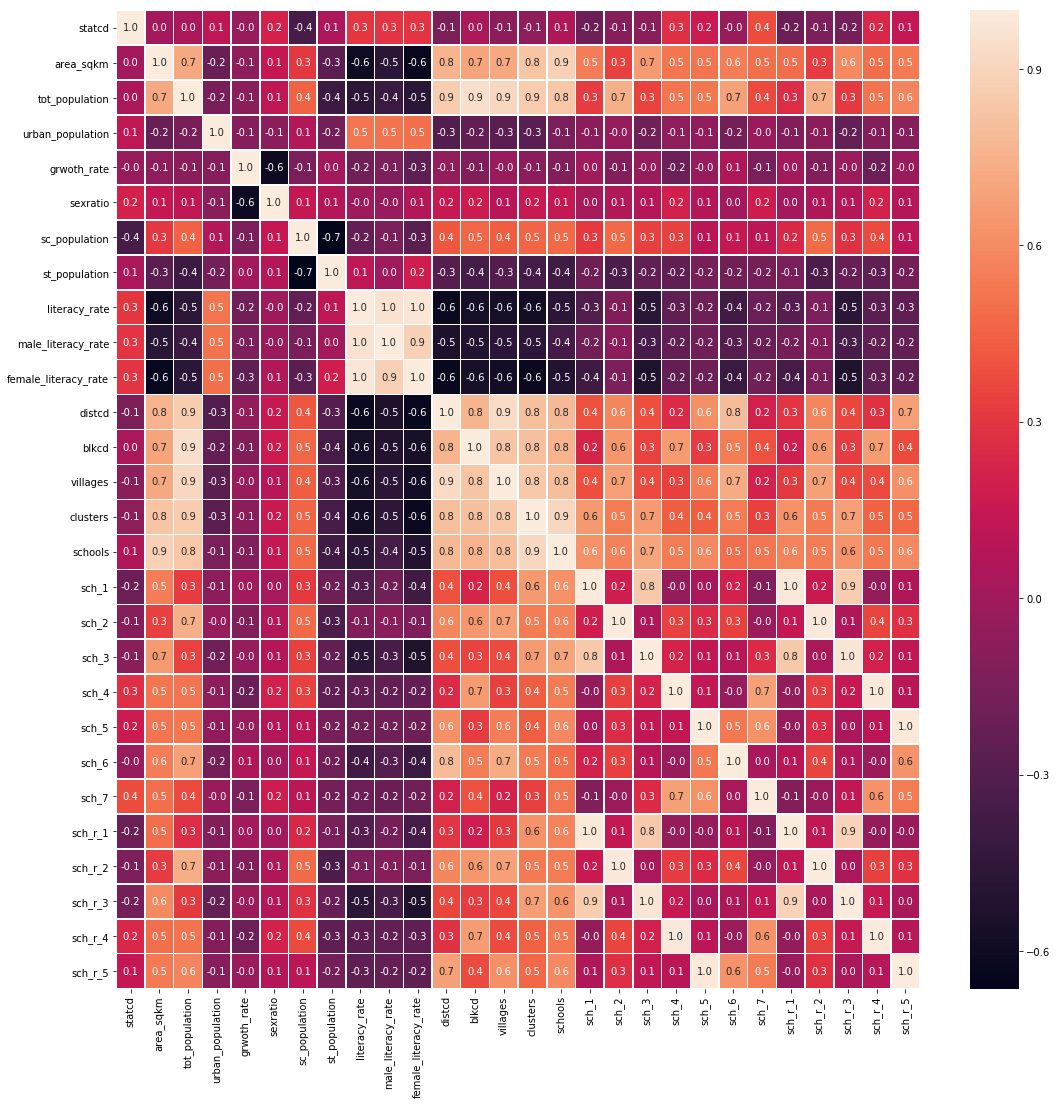

In [53]:
df_one=schools.iloc[:,0:30]
f,ax= plt.subplots(figsize=(18, 18))
sns.heatmap(df_one.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

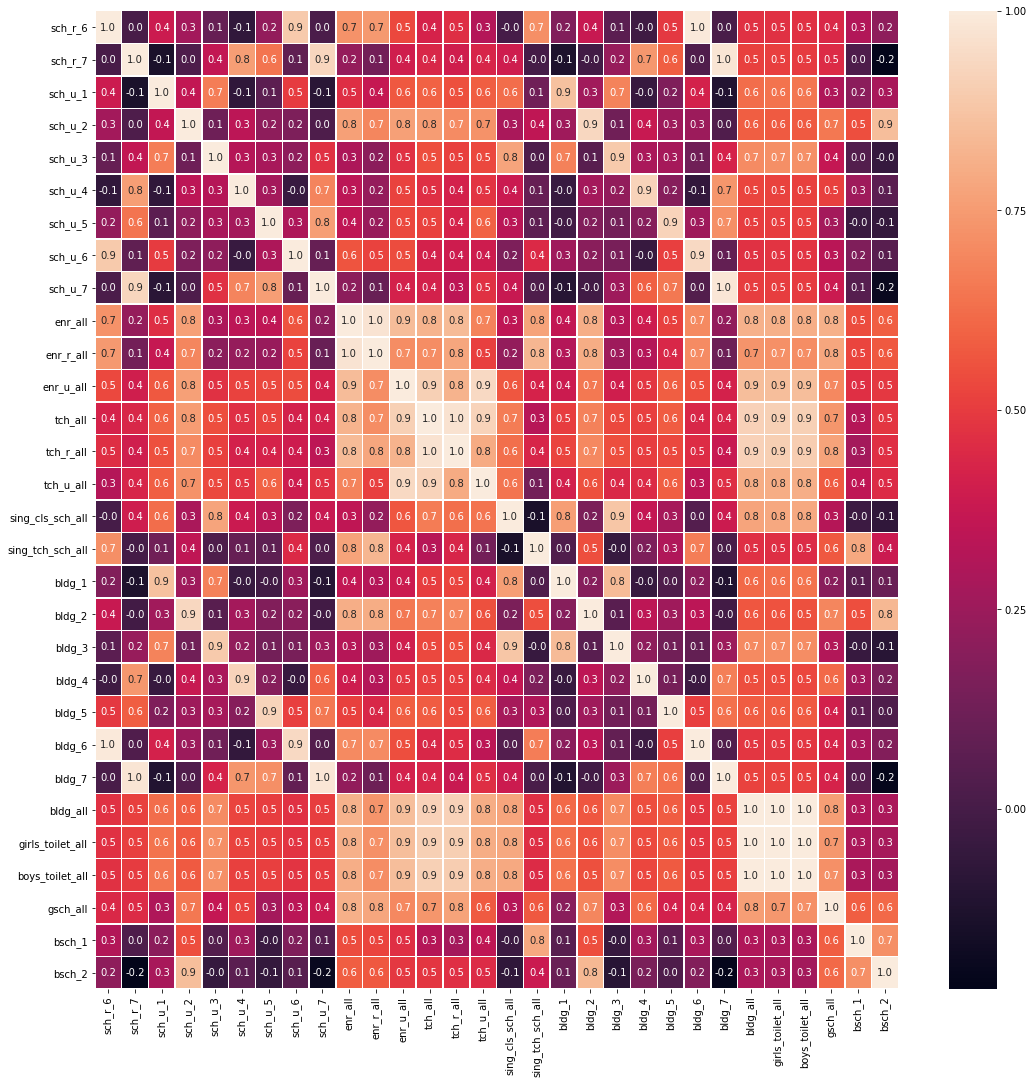

In [54]:
df_two=schools.iloc[:,30:60]
f,ax= plt.subplots(figsize=(18, 18))
sns.heatmap(df_two.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [55]:
#en_2,en_3 and en_4 are highly correlated so remove en_2 and en_3 and keep en_4 
#similarly keep tch_2 and remove tch_1 and tch_3

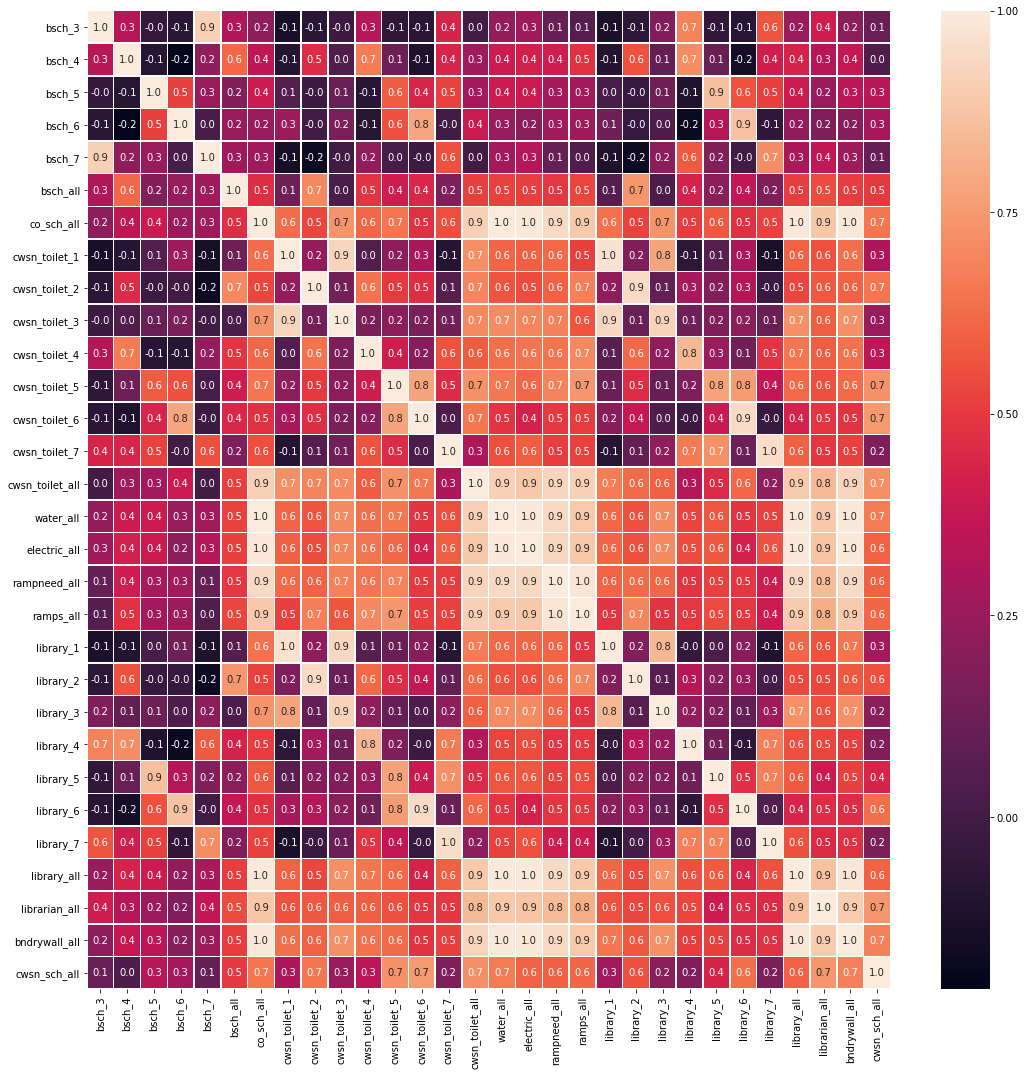

In [56]:
df_three=schools.iloc[:,60:90]
f,ax= plt.subplots(figsize=(18, 18))
sns.heatmap(df_three.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [57]:
#none of the features are so highly correlated , no need to remove any feature

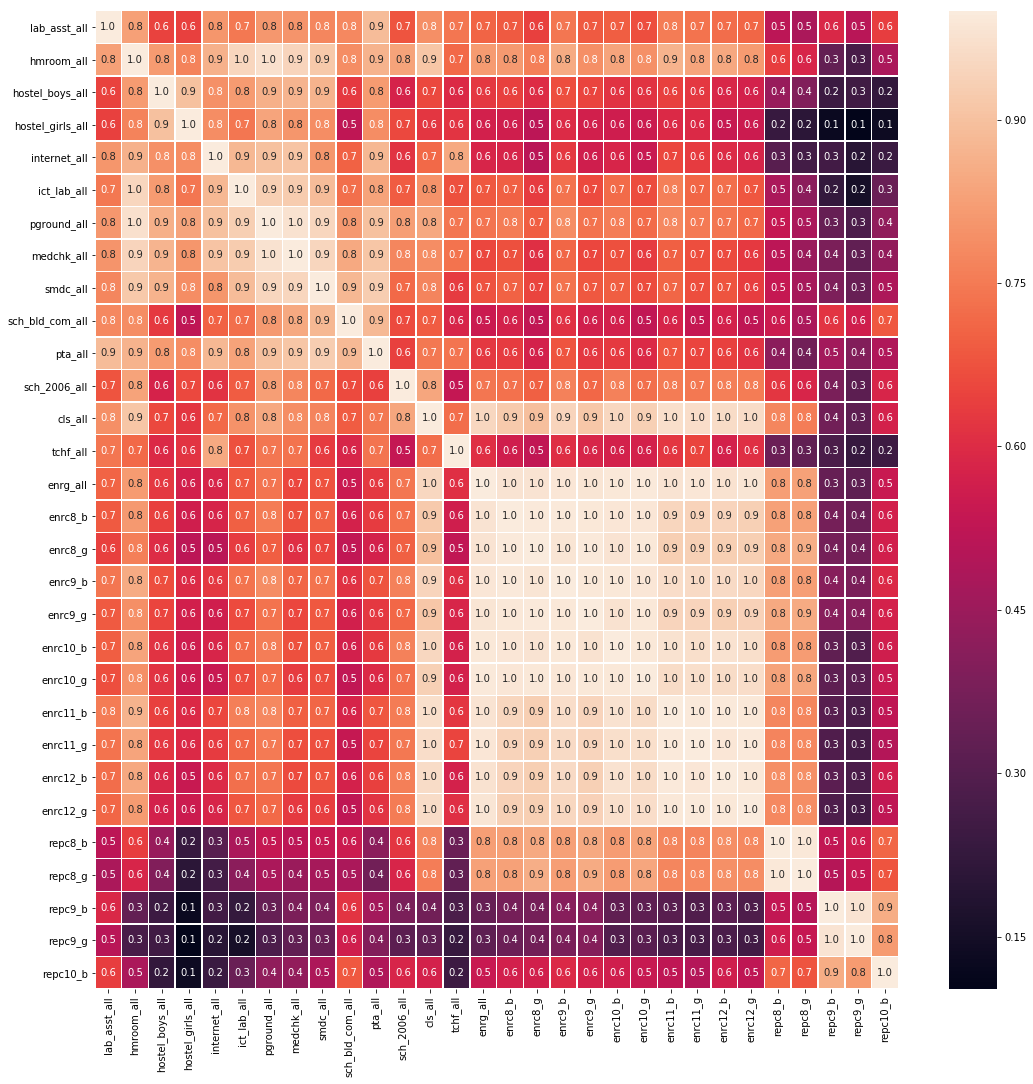

In [58]:
df_four=schools.iloc[:,90:120]
f,ax= plt.subplots(figsize=(18, 18))
sns.heatmap(df_four.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

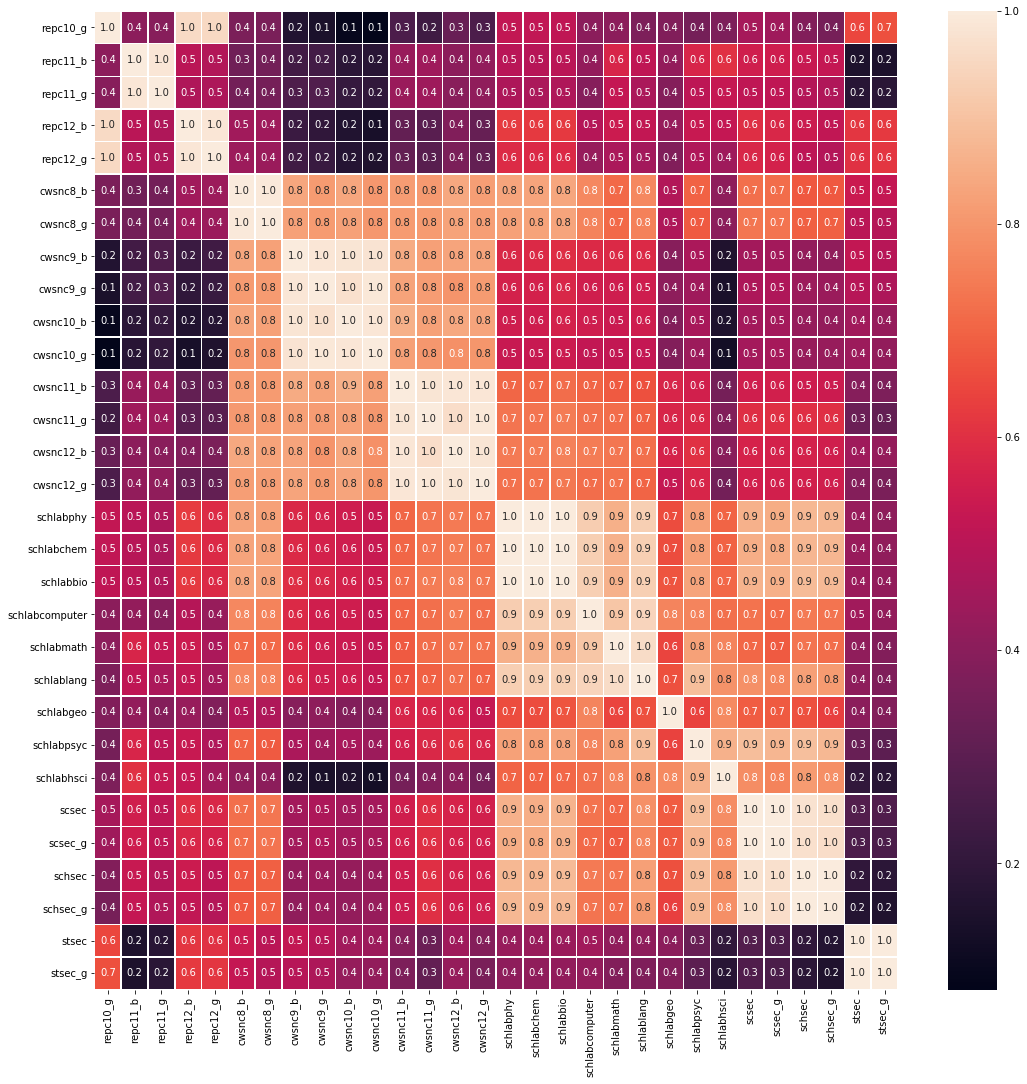

In [59]:
df_five=schools.iloc[:,120:150]
f,ax= plt.subplots(figsize=(18, 18))
sns.heatmap(df_five.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [60]:
#cwsn_toilet_4,cwsn_toilet_5 and cwsn_toilet_6 are also highly correlated so remove cwsn_toilet_5 and  cwsn_toilet_6 ,keep cwsn_toilet_4

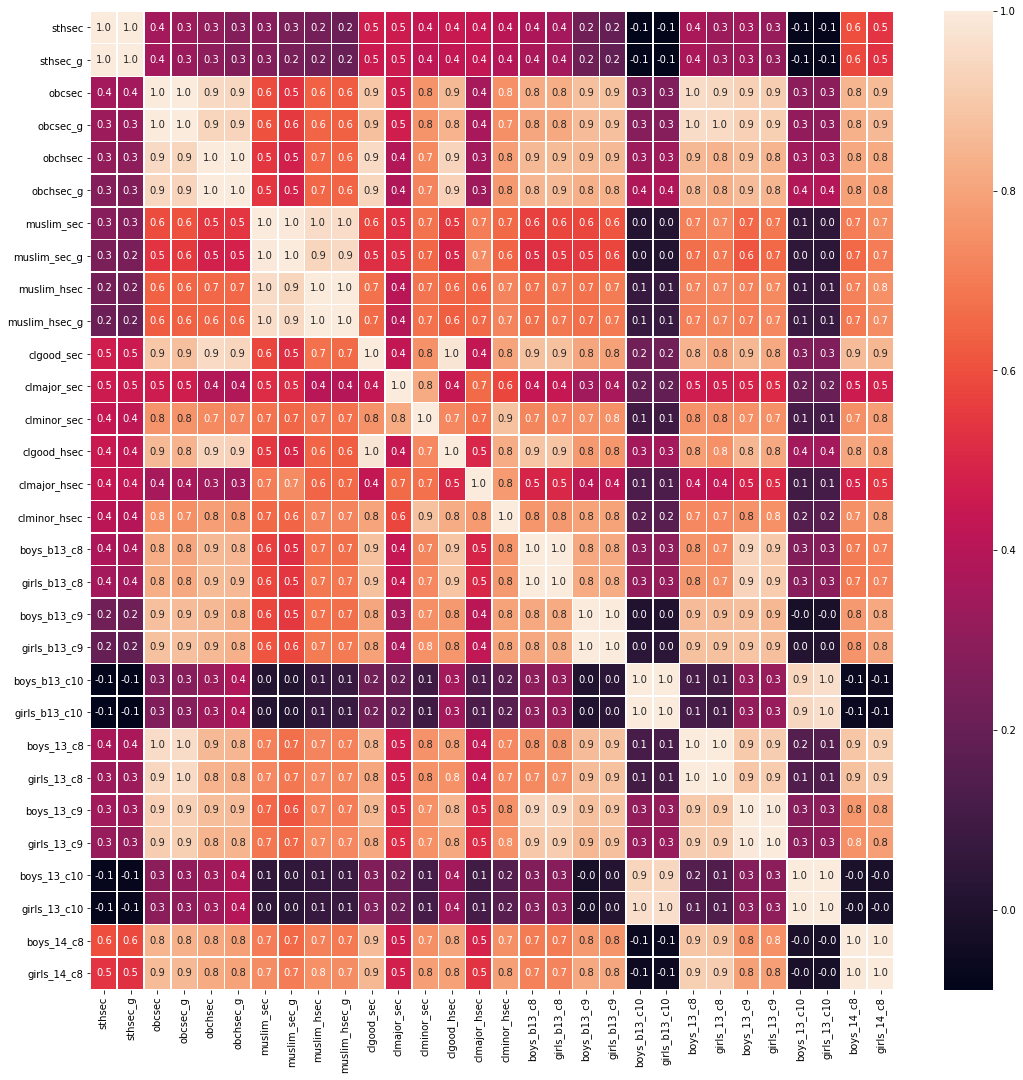

In [61]:
df_six=schools.iloc[:,150:180]
f,ax= plt.subplots(figsize=(18, 18))
sns.heatmap(df_six.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

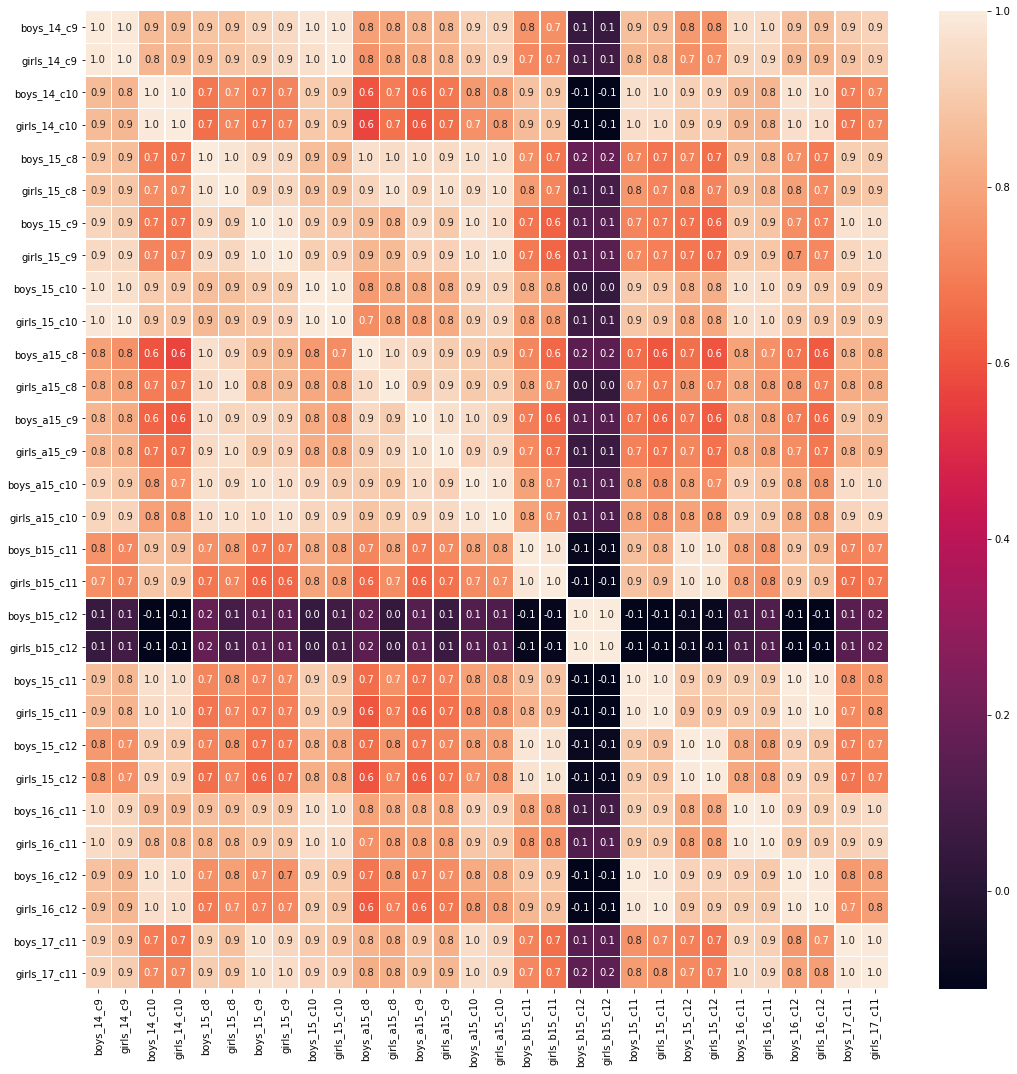

In [62]:
df_seven=schools.iloc[:,180:210]
f,ax= plt.subplots(figsize=(18, 18))
sns.heatmap(df_seven.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

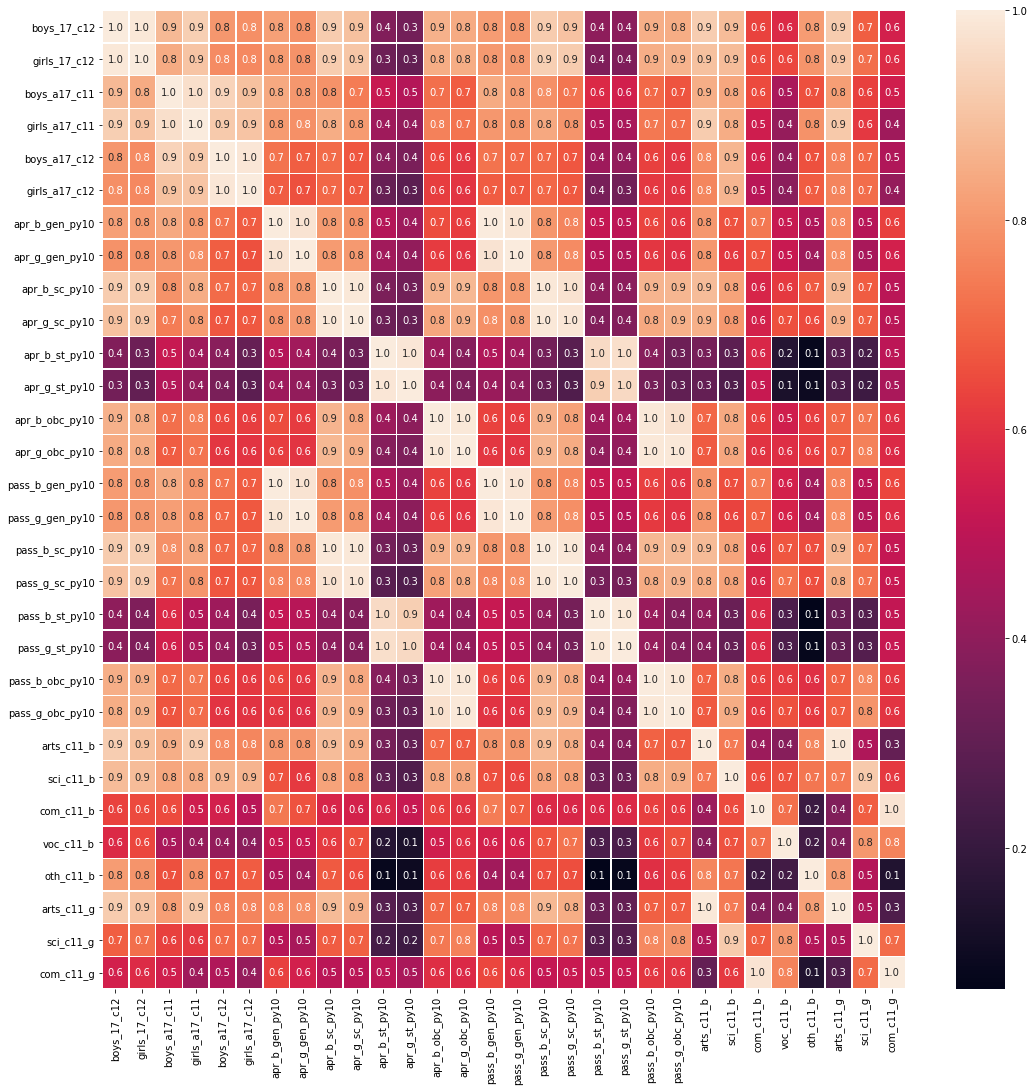

In [63]:

df_eight=schools.iloc[:,210:240]
f,ax= plt.subplots(figsize=(18, 18))
sns.heatmap(df_eight.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


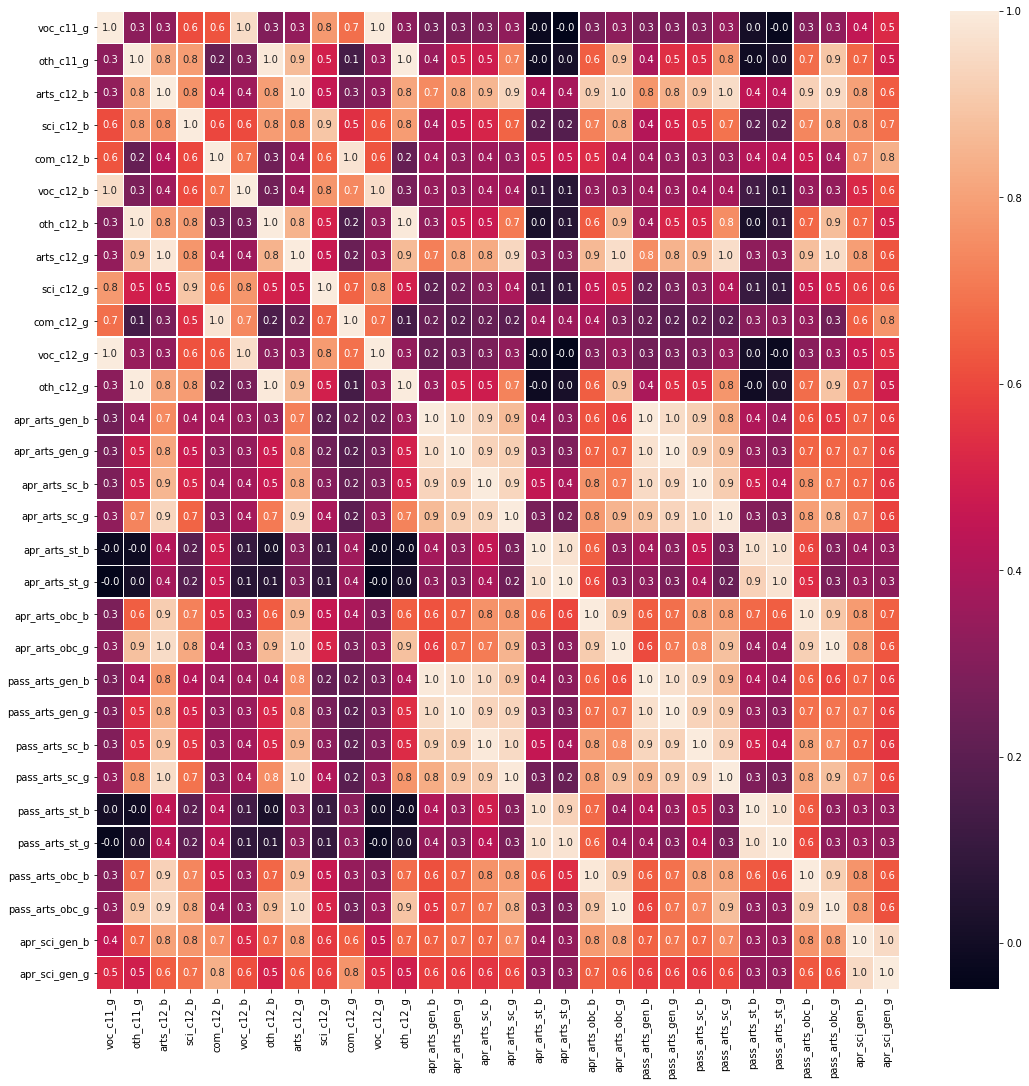

In [64]:
df_nine=schools.iloc[:,240:270]
f,ax= plt.subplots(figsize=(18, 18))
sns.heatmap(df_nine.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

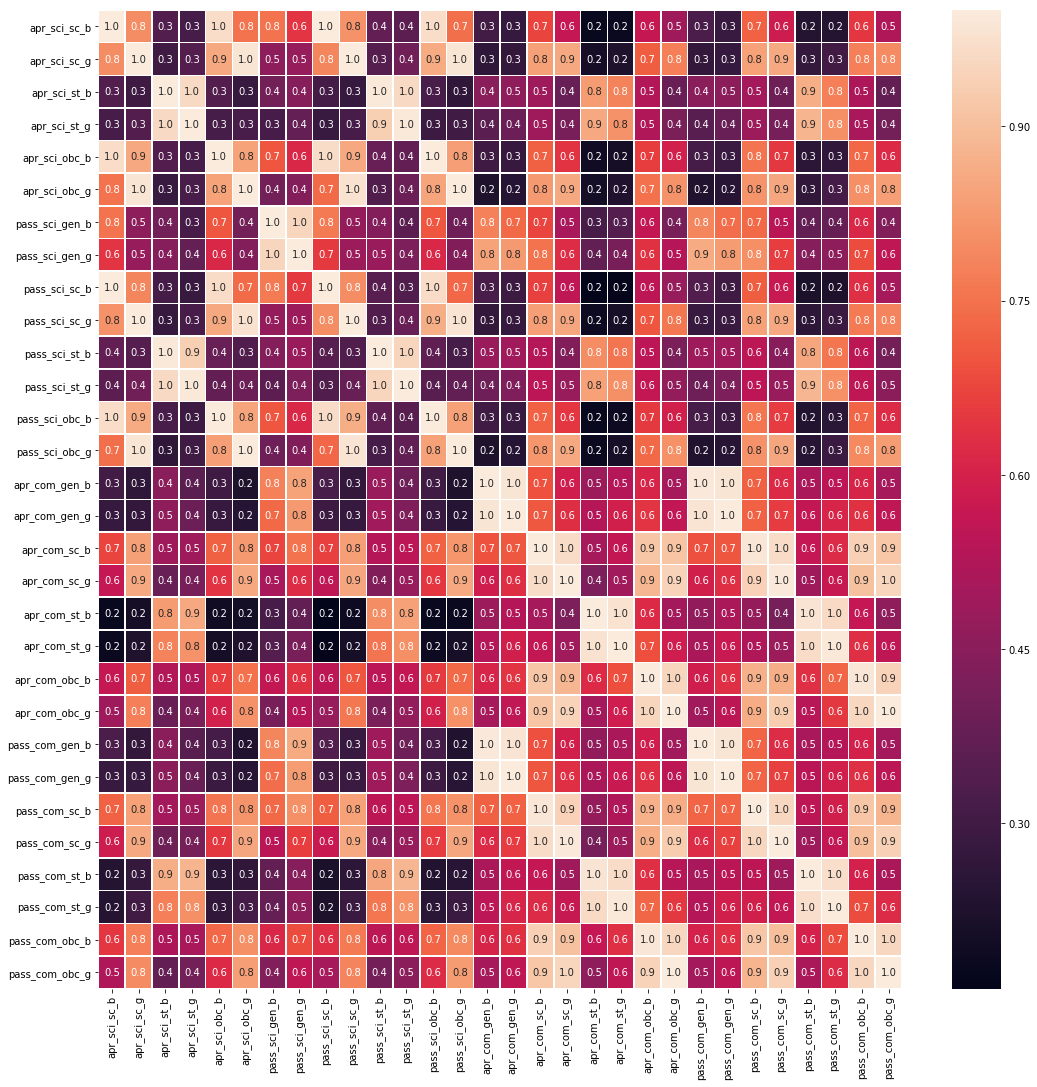

In [65]:
df_ten=schools.iloc[:,270:300]
f,ax= plt.subplots(figsize=(18, 18))
sns.heatmap(df_ten.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

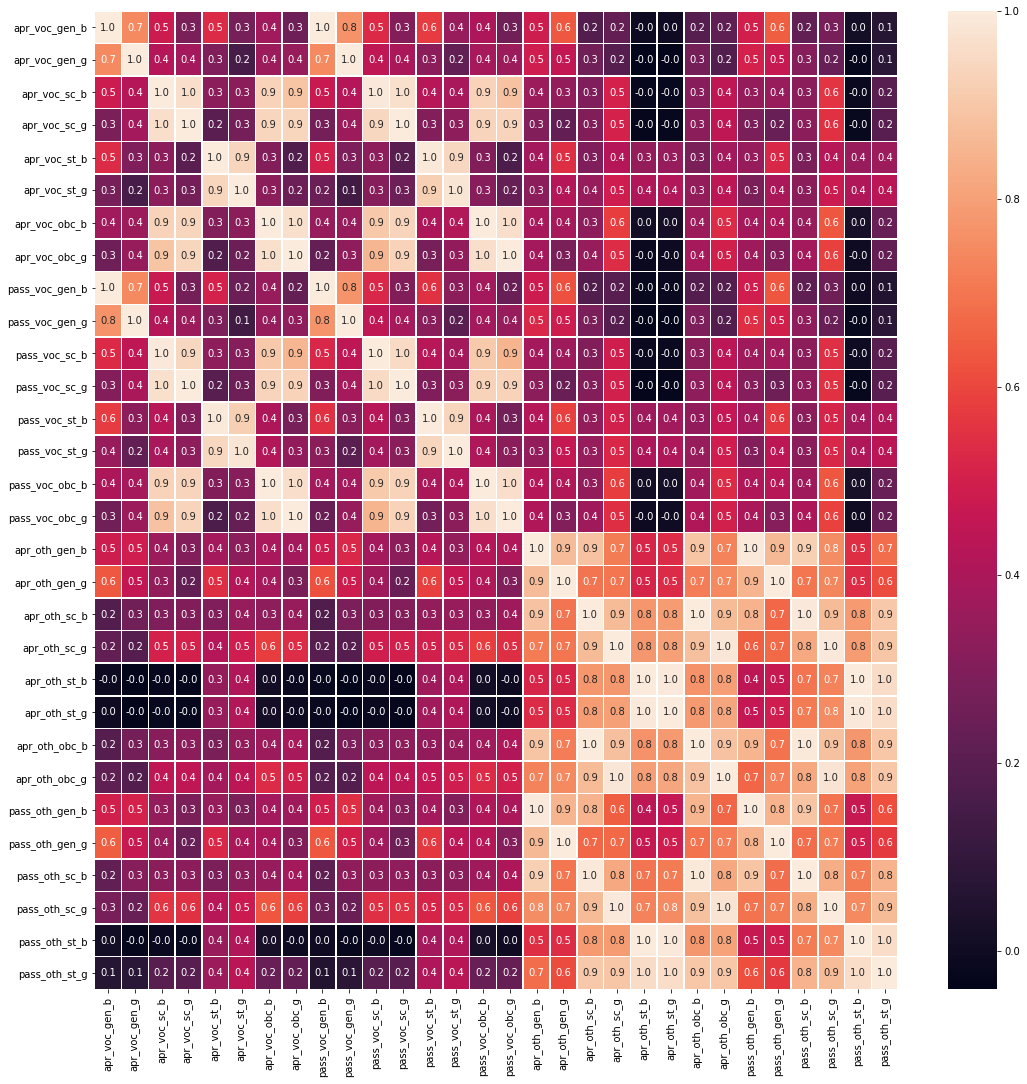

In [66]:
df_11=schools.iloc[:,300:330]
f,ax= plt.subplots(figsize=(18, 18))
sns.heatmap(df_11.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

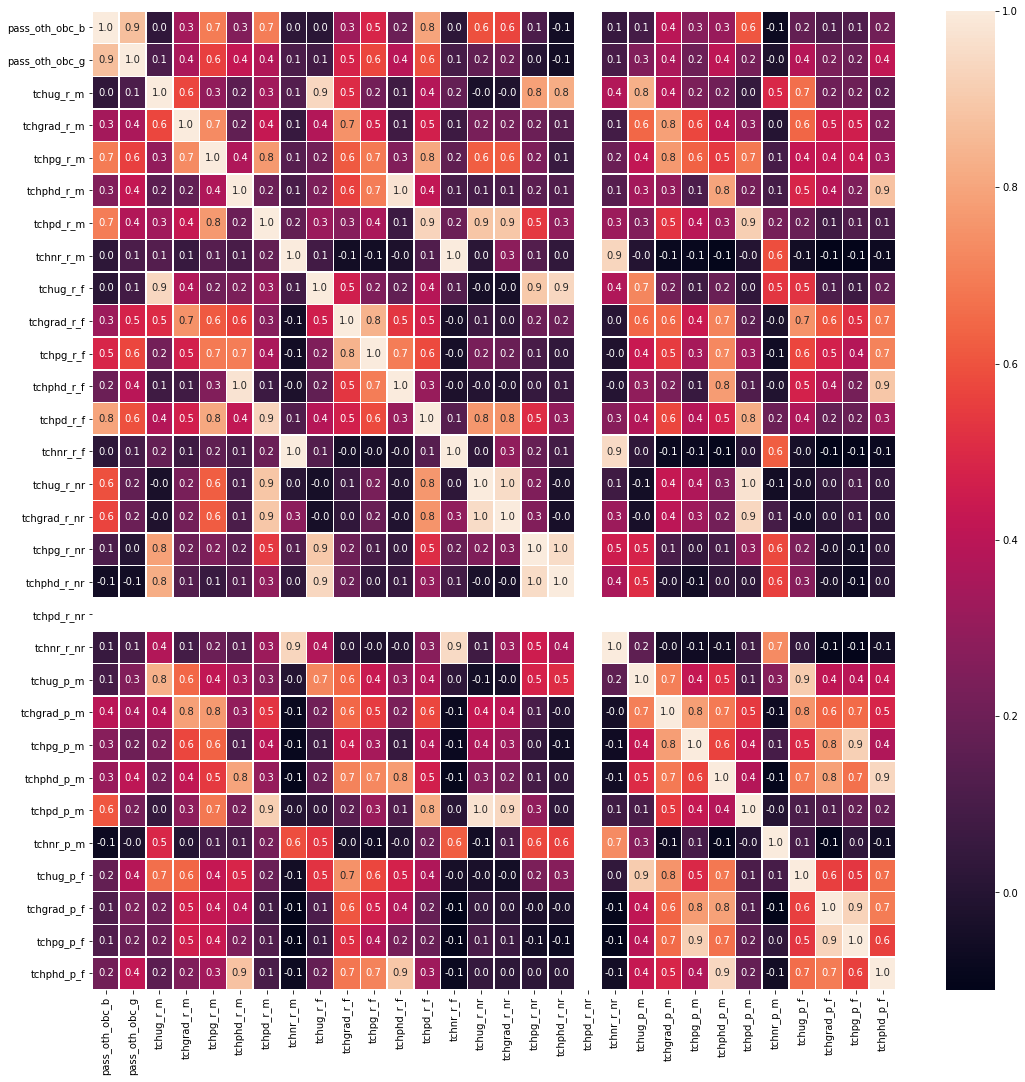

In [67]:
df_12=schools.iloc[:,330:360]
f,ax= plt.subplots(figsize=(18, 18))
sns.heatmap(df_12.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

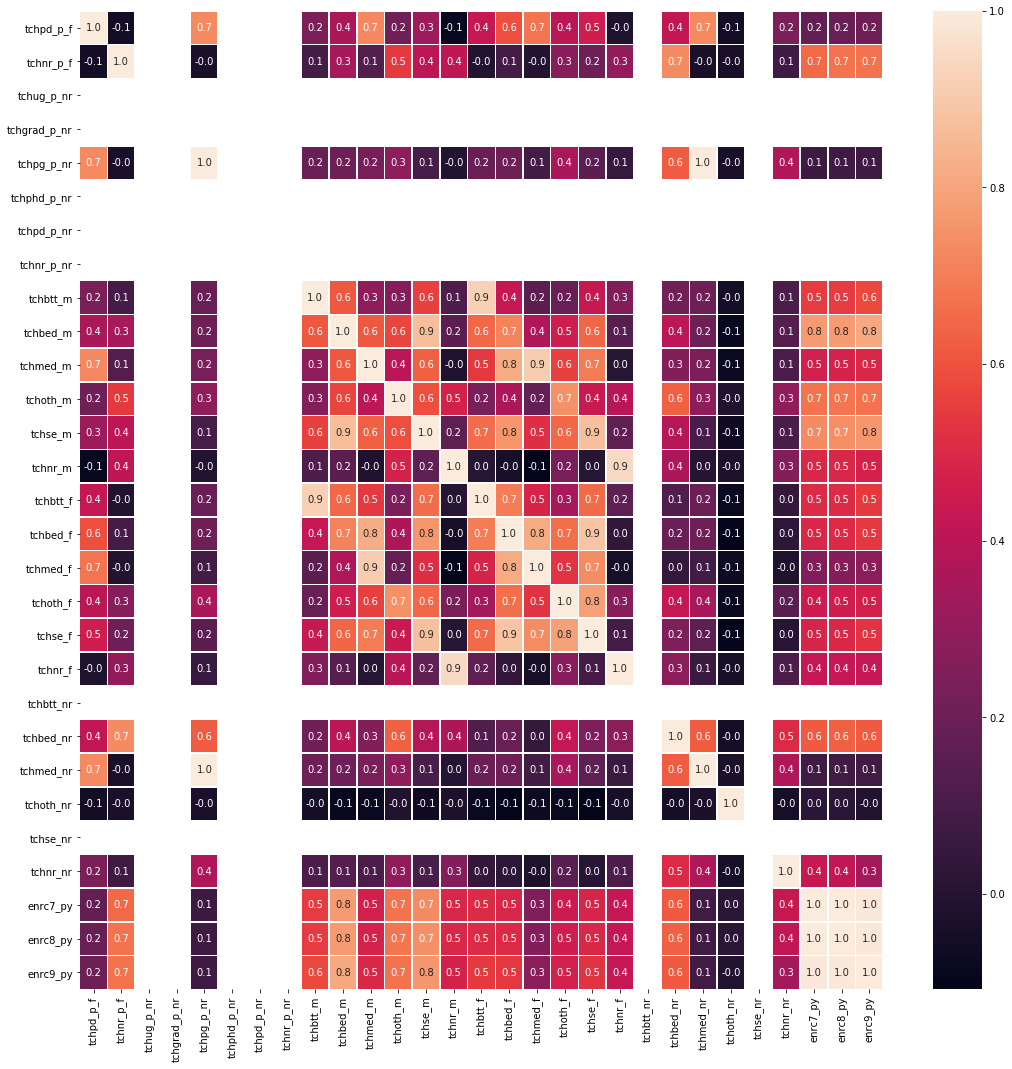

In [68]:
df_13=schools.iloc[:,360:389]
f,ax= plt.subplots(figsize=(18, 18))
sns.heatmap(df_13.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [69]:
to_remove=['literacy_rate','sch_r_4','sch_r_5','sch_1','sch_3','sch_4','sch_5','bsch_5','bsch_7',
           'cwsn_toilet_5','cwsn_toilet_6','sch_u_1', 'sch_u_2', 'sch_u_3', 'sch_u_4', 'sch_u_5', 'sch_u_6', 'sch_u_7'
           ,'library_4','library_5','library_6','bsch_3', 'bsch_4', 'boys_b13_c9', 'girls_b13_c9', 'boys_b13_c10', 
           'girls_b13_c10', 'boys_13_c8', 
           'girls_13_c8', 'boys_13_c9', 'girls_13_c9', 'boys_13_c10', 'girls_13_c10', 
           'boys_14_c8', 'girls_14_c8', 'boys_14_c9', 'girls_14_c9', 'boys_14_c10', 'girls_14_c10', 
           'boys_15_c8', 'girls_15_c8', 'boys_15_c9', 'girls_15_c9', 'boys_15_c10', 'girls_15_c10', 
           'boys_a15_c8', 'girls_a15_c8', 'boys_a15_c9', 'girls_a15_c9', 'boys_a15_c10', 'girls_a15_c10', 
           'boys_b15_c11', 'girls_b15_c11', 'boys_b15_c12', 'girls_b15_c12', 'boys_15_c11', 'girls_15_c11', 
           'boys_15_c12', 'girls_15_c12', 'boys_16_c11', 'girls_16_c11', 'boys_16_c12', 'girls_16_c12', 'boys_17_c11', 
           'girls_17_c11', 'boys_17_c12', 'girls_17_c12', 'boys_a17_c11', 'girls_a17_c11', 'boys_a17_c12', 
           'girls_a17_c12',
           'bsch_5', 'bsch_6','enrc8_b','enrc8_g','enrc9_b','enrc9_g','enrc10_g','enrc10_b','enrc11_b','enrc11_g',
          'enrc12_b','enrc12_g','repc10_b','repc11_b','repc11_g','repc12_b','repc12_g','cwsnc9_g','cwsnc11_b',
          'cwsnc12_b','cwsnc12_g','schlabchem','schlabbio','schlabmath','schlablang','scsec_g','schsec',
           'tchpg_p_f','tchgrad_p_f','tchpd_p_f'
          ,'pass_oth_gen_g','pass_oth_gen_b','apr_oth_sc_b','apr_oth_sc_g','apr_oth_st_b','apr_oth_st_g']

In [70]:
clean_data=schools.drop(to_remove,axis=1)

In [71]:
print(clean_data.head())

   ac_year  statcd           statname  area_sqkm  tot_population  \
0  2015-16       1  Jammu And Kashmir   222236.0        12548.93   
1  2015-16       2   Himachal Pradesh    55673.0         6856.51   
2  2015-16       3             Punjab    50362.0        27704.24   
3  2015-16       4         Chandigarh      114.0         1054.69   
4  2015-16       5        Uttarakhand    53483.0        10116.75   

   urban_population  grwoth_rate  sexratio  sc_population  st_population  \
0             20.05        23.71     883.0            7.4           11.9   
1              8.69        12.81     974.0           25.2            5.7   
2             29.82        13.73     893.0           31.9            0.0   
3             76.66        17.10     818.0           18.9            0.0   
4             21.54        19.17     963.0           18.8            2.9   

     ...     tchmed_nr  tchoth_nr  tchse_nr  tchnr_nr  enrc7_py  enrc8_py  \
0    ...             0          0         0         0    

In [72]:
clean_data=clean_data.drop(['statname','ac_year'],axis=1)
x=clean_data.values
#print(clean_data.values.shape)
imp=Imputer(missing_values='NaN',strategy='mean',axis=0)
imp.fit(x)
x=imp.transform(x)

In [73]:
x = StandardScaler().fit_transform(x)
new_x=pd.DataFrame(x)
pca = PCA(n_components=100)
pca.fit_transform(new_x)

array([[-5.84908863e+00,  1.28932042e+00, -1.08199026e+00, ...,
         1.04245678e-02,  1.54531327e-02,  8.63858035e-16],
       [-5.51704542e+00,  9.22722569e-01,  5.56712425e-01, ...,
        -4.36588097e-02, -5.96911269e-02,  8.63858035e-16],
       [ 1.97155858e+00,  1.11453714e+00,  2.68583333e+00, ...,
         3.73108245e-03,  1.85525346e-02,  8.63858035e-16],
       ...,
       [-9.41299667e+00,  1.32611888e+00,  1.68431913e+00, ...,
         3.38247187e-01,  1.26975998e-01,  8.63858035e-16],
       [-9.96463299e+00,  1.67141173e+00,  1.16500854e+00, ...,
        -2.45088598e-01, -2.04276936e-02,  8.63858035e-16],
       [ 2.08490993e+00, -4.71830322e+00,  1.31667048e+00, ...,
        -1.76099425e-02, -2.44580159e-02,  8.63858035e-16]])

In [74]:
print(pca.fit_transform(new_x).shape)

(36, 36)


In [75]:
final_features=pd.DataFrame(pca.components_,columns=clean_data.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9'
                                                                 ,'PC-10','PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17'
                                                                 ,'PC-18','PC-19','PC-20','PC-21','PC-22','PC-23','PC-24'
                                                                 ,'PC-25','PC-26','PC-27','PC-28','PC-29','PC-30','PC-31','PC-32'
                                                                 ,'PC-33','PC-34','PC-35','PC-36']).abs().sum(axis=0).sort_values(ascending=False)
print(final_features[:50])

statcd                  4.380648
urban_population        4.302382
grwoth_rate             4.186496
st_population           4.149546
sc_population           4.055678
sexratio                3.989611
male_literacy_rate      3.827587
female_literacy_rate    3.674821
tchoth_nr               3.670317
tchnr_p_m               3.091427
bsch_all                3.049881
sing_cls_sch_all        3.026008
gsch_all                2.911626
tchoth_f                2.753980
bsch_1                  2.738494
tchug_p_m               2.685658
tchoth_m                2.652605
tchpg_p_m               2.551219
area_sqkm               2.461425
tchnr_f                 2.444410
lab_asst_all            2.375988
pass_voc_st_b           2.371869
cwsn_toilet_4           2.358497
apr_voc_st_g            2.332774
apr_voc_gen_g           2.316141
pass_voc_st_g           2.313597
tchnr_m                 2.302846
repc8_g                 2.247580
tchgrad_p_m             2.217929
pass_sci_st_g           2.200746
bsch_2    

In [76]:
final_model_data= clean_data.drop(clean_data.columns[50:284],axis=1)

In [213]:
print(final_model_data.columns[40:50])

Index(['boys_toilet_all', 'gsch_all', 'bsch_1', 'bsch_2', 'bsch_all',
       'co_sch_all', 'cwsn_toilet_1', 'cwsn_toilet_2', 'cwsn_toilet_3',
       'cwsn_toilet_4'],
      dtype='object')


In [94]:
final_model_data=final_model_data.fillna(final_model_data.mean())
print(final_model_data.head())

   statcd  area_sqkm  tot_population  urban_population  grwoth_rate  sexratio  \
0       1   222236.0        12548.93             20.05        23.71     883.0   
1       2    55673.0         6856.51              8.69        12.81     974.0   
2       3    50362.0        27704.24             29.82        13.73     893.0   
3       4      114.0         1054.69             76.66        17.10     818.0   
4       5    53483.0        10116.75             21.54        19.17     963.0   

   sc_population  st_population  male_literacy_rate  female_literacy_rate  \
0            7.4           11.9               78.26                 58.01   
1           25.2            5.7               90.83                 76.60   
2           31.9            0.0               81.48                 71.34   
3           18.9            0.0               90.54                 81.38   
4           18.8            2.9               88.33                 70.70   

       ...        boys_toilet_all  gsch_all  bsch_

## KNN

In [214]:
def applyKNN(features,row,index):
    from sklearn.neighbors import KNeighborsRegressor
    X_train,X_test,y_train,y_test=train_test_split(features,y,test_size=0.2,random_state=21)
    neigh = KNeighborsRegressor()
    params = {'n_neighbors':[3,4,5,6],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute']}
    clf=GridSearchCV(neigh,params,cv=5)
    clf.fit(X_train,y_train)
    print(clf.predict(row))
    if index==0:
       print(clf.score(X_test,y_test))

## Linear SVR 

In [215]:
def applyLSVR(features,row,index):
    from sklearn.svm import LinearSVR
    regr = LinearSVR(random_state=0, tol=1e-5)
    X_train,X_test,y_train,y_test=train_test_split(features,y,test_size=0.2,random_state=21)
    regr.fit(X_train,y_train)
    print(regr.predict(row))
    if index==0:
       print(regr.score(X_test,y_test))


## linear regression

In [216]:
def applyLR(features,row,index):
    X_train,X_test,y_train,y_test=train_test_split(features,y,test_size=0.2,random_state=21)
    model_lr=LinearRegression()
    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
    clf=GridSearchCV(model_lr,parameters,cv=5)
    clf.fit(X_train,y_train)
    y1=y.loc[index]
    y_pre=clf.predict(row)
    print(clf.predict(row))
    y_s=np.array([y1])
    if index==0:
       print(clf.score(X_test,y_test))

In [217]:
## FEATURE SET 1-10

feature_set1 = final_model_data.iloc[:,:10]
#print(feature_set1)
feature_set2 = final_model_data.iloc[:,10:20]
feature_set3 = final_model_data.iloc[:,20:30]
feature_set4 = final_model_data.iloc[:,30:40]
feature_set5 = final_model_data.iloc[:,40:50]

## feature set selection with LR

In [218]:
for d in range(36):
    index=d;
    row=final_model_data.iloc[d:d+1,0:10]
    applyLR(feature_set1,row,index)

[68.63567667]
0.9999282045230915
[83.83399365]
[76.60337056]
[86.3823723]
[79.73890396]
[76.56682183]
[86.31895314]
[67.0008018]
[69.73960399]
[63.82494923]
[82.26485259]
[66.95713013]
[80.040473]
[79.96681829]
[91.64486613]
[87.79938876]
[75.51985607]
[73.23312748]
[77.05929296]
[67.64966834]
[73.49953435]
[71.19300211]
[70.5935647]
[79.3613902]
[87.17935967]
[77.41702679]
[82.96133307]
[67.61813232]
[75.59156255]
[87.4015337]
[92.26471402]
[93.68353635]
[80.34147293]
[86.60589435]
[86.33006033]
[78.6490911]


In [219]:
for d in range(36):
    index=d;
    row=final_model_data.iloc[d:d+1,0:10]
    applyLR(feature_set2,row,index)

[-2177.12211335]
-4.945707616957902
[-469.7551948]
[-411.16197075]
[94.92410234]
[-448.06857359]
[-350.42786209]
[84.44414654]
[-3394.99575032]
[-2320.14184055]
[-842.07446859]
[21.09787937]
[-764.48098501]
[-75.81455427]
[-134.6410739]
[-122.75013089]
[-14.38588241]
[-136.81085484]
[-704.76935446]
[-794.35381221]
[-718.21627591]
[-1495.25403347]
[-1289.6781546]
[-3052.82830876]
[-1906.15574014]
[81.36390957]
[79.76668421]
[-3038.60395542]
[-2710.72870279]
[-1864.3801182]
[47.30780525]
[84.36682935]
[-303.84468455]
[-1229.90075794]
[79.18964851]
[-3.44628329]
[-872.05367068]


In [220]:
for d in range(36):
    index=d;
    row=final_model_data.iloc[d:d+1,0:10]
    applyLR(feature_set3,row,index)

[-1790.21442814]
-1.9372930023226758
[-476.5999958]
[-706.45170792]
[1.86028891]
[-509.0902087]
[-650.12402056]
[-231.4442343]
[-3445.94986701]
[-4533.72749109]
[-2111.30295056]
[-99.35280832]
[-703.56707861]
[-259.80198639]
[-238.72116643]
[-302.78912425]
[-150.44580907]
[-303.6389969]
[-1004.2024291]
[-1903.62181345]
[-1051.34054793]
[-1724.36247068]
[-1357.98552442]
[-3267.62413329]
[-2290.65055348]
[-23.2107344]
[-78.36264518]
[-3827.41064074]
[-3167.20851042]
[-2237.9186293]
[-64.41505889]
[-140.77696537]
[-748.46133854]
[-1936.07725851]
[-0.96404596]
[-80.08597625]
[-1183.46125391]


In [221]:
for d in range(36):
    index=d;
    row=final_model_data.iloc[d:d+1,0:10]
    applyLR(feature_set4,row,index)

[-1165.66449064]
-0.630309732512526
[-249.31088969]
[-312.22414112]
[74.06377333]
[-251.95553747]
[-268.79418925]
[-2.50596168]
[-2054.80357243]
[-2087.39634934]
[-880.96764958]
[38.81511195]
[-375.48066262]
[-18.36372949]
[-52.74472485]
[-39.12135125]
[6.65287272]
[-54.51148266]
[-477.773845]
[-797.48206363]
[-492.75765032]
[-939.11191908]
[-757.38928705]
[-1890.23553637]
[-1235.58559953]
[79.16400548]
[75.55059962]
[-2061.94866972]
[-1765.7467434]
[-1216.53667584]
[52.70341218]
[78.35690043]
[-276.2177894]
[-934.57381489]
[70.19635126]
[33.80368467]
[-575.68608051]


In [222]:
for d in range(36):
    index=d;
    row=final_model_data.iloc[d:d+1,0:10]
    applyLR(feature_set5,row,index)

[-4578.43000736]
-0.7311175767903217
[-989.53577594]
[-334.56840561]
[112.89032695]
[-855.79437096]
[-256.99346757]
[484.77210959]
[-5832.45103664]
[-202.38165724]
[632.94940785]
[-59.9381051]
[-1758.95260976]
[-237.2588694]
[-346.58605963]
[-359.06811423]
[-57.20100905]
[-343.31721656]
[-876.48850824]
[435.99119872]
[-858.61442411]
[-2333.1978459]
[-2293.43260679]
[-4967.83963245]
[-2763.0719738]
[89.14810993]
[82.19886426]
[-3934.74264935]
[-3913.77408667]
[-2649.39925662]
[40.68398624]
[86.7584078]
[69.14406549]
[-981.88673118]
[107.86091917]
[-89.96692222]
[-1135.19503582]





## feature set selection with KNN

In [223]:
for d in range(36):
    index=d;
    row=final_model_data.iloc[d:d+1,0:10]
    applyKNN(feature_set1,row,index)

[72.59666667]
0.0130234414080036
[77.65]
[82.41]
[83.75666667]
[77.65]
[82.41]
[86.76333333]
[73.73333333]
[73.43]
[70.03295238]
[85.29]
[73.48]
[82.39]
[82.39]
[82.39]
[85.40666667]
[82.39]
[73.15295238]
[70.03295238]
[73.15295238]
[73.36333333]
[74.37961905]
[73.73333333]
[72.59666667]
[85.66666667]
[85.66666667]
[73.73333333]
[73.73333333]
[72.59666667]
[83.86666667]
[85.66666667]
[82.41]
[69.43666667]
[83.75666667]
[85.40666667]
[73.15295238]


In [224]:
for d in range(36):
    index=d;
    row=final_model_data.iloc[d:d+1,0:10]
    applyKNN(feature_set2,row,index)

[72.01]
-1.1480293446613041
[74.77666667]
[70.61666667]
[87.06]
[74.61666667]
[70.61666667]
[75.78333333]
[69.3]
[74.42]
[68.05666667]
[85.29]
[84.73333333]
[83.35333333]
[86.48]
[83.35333333]
[86.48]
[84.73333333]
[67.49666667]
[68.05666667]
[68.3]
[68.3]
[70.61666667]
[68.05666667]
[69.3]
[83.49]
[83.49]
[68.05666667]
[68.05666667]
[69.3]
[83.35333333]
[88.54]
[68.3]
[69.3]
[84.63]
[85.00666667]
[68.3]


In [225]:
for d in range(36):
    index=d;
    row=final_model_data.iloc[d:d+1,0:10]
    applyKNN(feature_set3,row,index)

[85.66666667]
-0.45671794727060533
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]
[85.66666667]


In [226]:
for d in range(36):
    index=d;
    row=final_model_data.iloc[d:d+1,0:10]
    applyKNN(feature_set4,row,index)

[74.65]
-0.6845513984098996
[79.88666667]
[82.41]
[83.66333333]
[82.41]
[82.41]
[84.17333333]
[74.65]
[74.34666667]
[74.34666667]
[86.88]
[74.65]
[89.33333333]
[89.33333333]
[89.33333333]
[86.88]
[89.33333333]
[82.41]
[74.34666667]
[82.41]
[74.65]
[74.65]
[74.65]
[74.65]
[83.66333333]
[83.66333333]
[72.34333333]
[72.34333333]
[74.65]
[86.88]
[83.66333333]
[82.41]
[74.65]
[85.00666667]
[86.88]
[82.41]


In [227]:
for d in range(36):
    index=d;
    row=final_model_data.iloc[d:d+1,0:10]
    applyKNN(feature_set5,row,index)

[70.15]
-0.7534416137298672
[79.18666667]
[85.42333333]
[85.38333333]
[79.18666667]
[85.42333333]
[85.42333333]
[71.43]
[70.15]
[79.18666667]
[85.42333333]
[79.18666667]
[85.42333333]
[85.42333333]
[85.42333333]
[85.42333333]
[85.42333333]
[79.18666667]
[79.18666667]
[79.18666667]
[68.3]
[69.7]
[71.43]
[70.15]
[85.38333333]
[83.86666667]
[71.43]
[70.15]
[70.15]
[85.49333333]
[84.68666667]
[85.42333333]
[79.18666667]
[86.36333333]
[85.42333333]
[79.18666667]


## feature set selection with SVM

In [228]:
for d in range(36):
    index=d;
    row=final_model_data.iloc[d:d+1,0:10]
    applyLSVR(feature_set1,row,index)

[194.43618039]
-122.1286239024172
[112.17780364]
[94.42641846]
[86.7041406]
[108.49491031]
[92.65805406]
[82.76041755]
[238.04663085]
[126.12987439]
[79.59674195]
[85.55237766]
[121.10989833]
[88.57579152]
[95.77946927]
[106.2462746]
[92.26032036]
[94.0076685]
[109.14606699]
[91.75907117]
[105.78198979]
[148.50909264]
[144.15445176]
[220.75158516]
[169.166696]
[87.07]
[83.39876182]
[213.26562901]
[195.07589592]
[163.98869942]
[91.6301559]
[92.73270664]
[103.4464093]
[128.92576291]
[93.91714665]
[90.97588486]
[121.85523359]


In [229]:
for d in range(36):
    index=d;
    row=final_model_data.iloc[d:d+1,0:10]
    applyLSVR(feature_set2,row,index)

[712410.12257293]
-47195.541865660714
[178180.06127522]
[160579.27844979]
[109.70565178]
[171072.59186307]
[140939.21247811]
[4071.36808044]
[1095901.45656184]
[767271.07222777]
[299047.18769353]
[22592.29744247]
[268464.57588731]
[52985.17663423]
[71375.54616358]
[67447.81302736]
[33393.89535008]
[71730.53724136]
[250644.55056118]
[282080.38432559]
[254698.05368622]
[498263.42200725]
[432892.98781021]
[986826.55790692]
[627133.32599726]
[363.47459012]
[1539.35270305]
[984048.64490942]
[879981.09787974]
[613543.95265624]
[11746.26576649]
[55.71098001]
[123665.7130468]
[415195.85238109]
[1407.09671373]
[26435.40399705]
[300345.59497372]


In [230]:
for d in range(36):
    index=d;
    row=final_model_data.iloc[d:d+1,0:10]
    applyLSVR(feature_set3,row,index)

[1752.50981519]
-9316578.790592553
[432.7445618]
[287.02355357]
[10.67098669]
[397.62664936]
[247.25704631]
[-55.09691276]
[2451.73503616]
[990.84013181]
[266.83347043]
[69.3125873]
[685.97410163]
[141.76509687]
[182.04224022]
[185.25939743]
[83.48993208]
[184.00274149]
[496.29040599]
[287.18531548]
[496.93989517]
[1070.93201177]
[984.19831438]
[2157.7800134]
[1308.11478182]
[13.51738117]
[15.96365519]
[1960.97357926]
[1828.72098872]
[1269.74556388]
[37.037775]
[19.02458125]
[167.89209368]
[715.9682636]
[12.09193063]
[78.84226208]
[606.44028423]


In [231]:
for d in range(36):
    index=d;
    row=final_model_data.iloc[d:d+1,0:10]
    applyLSVR(feature_set4,row,index)

[-14567.98554321]
-539.5043186010431
[-3807.85356004]
[-3549.47579225]
[-174.80972338]
[-3681.68983685]
[-3136.87335347]
[-341.71750965]
[-22569.60983239]
[-16618.8732144]
[-6716.72110003]
[-600.42932283]
[-5536.42816744]
[-1184.9739155]
[-1612.18439459]
[-1480.00297598]
[-847.5844571]
[-1582.50957924]
[-5369.38876865]
[-6308.72565156]
[-5449.77243317]
[-10401.76033144]
[-9002.21981456]
[-20379.77857104]
[-13081.26028449]
[-118.25281993]
[-139.606904]
[-20527.89901035]
[-18308.54549404]
[-12824.34556272]
[-409.65050449]
[-98.49285876]
[-2847.6101085]
[-8896.20747387]
[-225.82001925]
[-678.50667751]
[-6364.23195675]


In [232]:
for d in range(36):
    index=d;
    row=final_model_data.iloc[d:d+1,0:10]
    applyKNN(feature_set1,row,index)

[72.59666667]
0.0130234414080036
[77.65]
[82.41]
[83.75666667]
[77.65]
[82.41]
[86.76333333]
[73.73333333]
[73.43]
[70.03295238]
[85.29]
[73.48]
[82.39]
[82.39]
[82.39]
[85.40666667]
[82.39]
[73.15295238]
[70.03295238]
[73.15295238]
[73.36333333]
[74.37961905]
[73.73333333]
[72.59666667]
[85.66666667]
[85.66666667]
[73.73333333]
[73.73333333]
[72.59666667]
[83.86666667]
[85.66666667]
[82.41]
[69.43666667]
[83.75666667]
[85.40666667]
[73.15295238]


In [233]:
for d in range(36):
    index=d;
    row=final_model_data.iloc[d:d+1,0:10]
    applyLSVR(feature_set5,row,index)

[16519.57860713]
-2320.0474057073106
[7156.99468615]
[24795.59797365]
[799.99330804]
[9890.66262793]
[22640.86733511]
[14200.3353204]
[67500.66253856]
[176326.87333857]
[90788.34586601]
[549.07710175]
[3257.38374547]
[1951.4359603]
[2745.04661652]
[1323.76721228]
[3233.08443648]
[2931.70992624]
[28488.07725132]
[80031.09288923]
[30059.35345929]
[39741.61834905]
[25215.02164542]
[69972.78878321]
[56565.28759834]
[142.65262921]
[185.91359018]
[103855.76359823]
[79343.78118043]
[57069.35758069]
[1198.1510871]
[-104.68765578]
[29299.03318869]
[64786.13262883]
[915.85788538]
[414.67781176]
[31826.81016178]
